In [2]:
import os
import json
from itertools import product
import numpy as np
from scipy.interpolate import RegularGridInterpolator, interp1d
from scipy.optimize import brentq, minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cache = np.load('_ring_radius_cache/outputs+20251027_215518.npz')
Vtip = cache['Vtip']
Rtip = cache['Rtip']
Htip = cache['Htip']
r = cache['r']
data = cache['data']

print(f"{data.shape=}")

data.shape=(25, 9, 31, 200)


In [4]:
Vtip_idx = np.argwhere(Vtip == -2)[0, 0]
R_tip_idx = np.argwhere(Rtip == 40)[0, 0]
r_indices = np.arange((r <= 100).sum())
target_data = data[Vtip_idx, R_tip_idx, :, r_indices]
target_r = r[r_indices]
print(f"{target_data.shape=}")

target_data.shape=(40, 31)


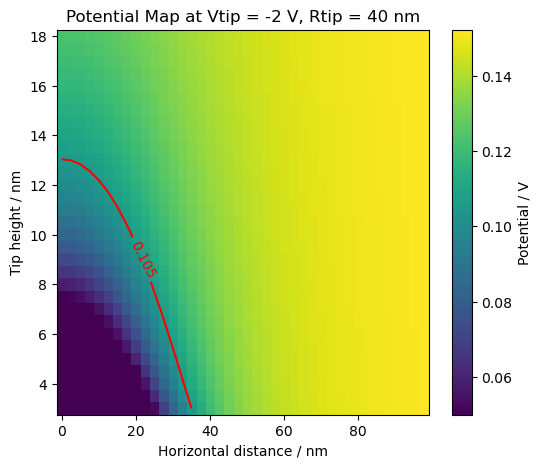

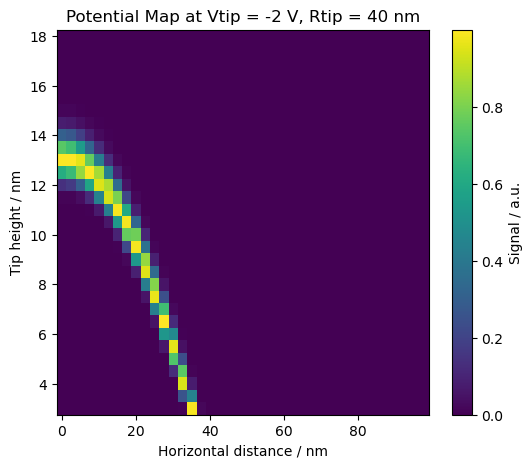

In [13]:
def plot_contour(x, y, d, mode='contour', **kwargs):
    fig, ax = plt.subplots(figsize=(6, 5))
    if mode == 'contour':
        im = ax.contourf(x, y, d, levels=100, cmap='viridis',
                         vmin=kwargs.get('vmin', None), vmax=kwargs.get('vmax', None))
    elif mode == 'pcolormesh':
        im = ax.pcolormesh(x, y, d, cmap='viridis',
                           vmin=kwargs.get('vmin', None), vmax=kwargs.get('vmax', None))
    if 'contour_lines' in kwargs:
        cs = ax.contour(x, y, d, levels=kwargs['contour_lines'], colors='red', linewidths=1.5)
        ax.clabel(cs, inline=True, fontsize=10, fmt='%1.3f')
    ax.set_xlabel(kwargs.get('xlabel', 'X'))
    ax.set_ylabel(kwargs.get('ylabel', 'Y'))
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(kwargs.get('cbar_label', 'Z'))
    plt.title(kwargs.get('title', 'Contour Plot'))
    plt.show()

plot_contour(
    target_r, Htip, target_data.T,
    mode='pcolormesh',
    contour_lines=[0.105],
    vmin=0.05,
    xlabel='Horizontal distance / nm',
    ylabel='Tip height / nm',
    cbar_label='Potential / V',
    title='Potential Map at Vtip = -2 V, Rtip = 40 nm'
)

plot_contour(
    target_r, Htip, np.exp(-np.square(target_data.T-0.105)/(2*0.003**2)),
    mode='pcolormesh',
    xlabel='Horizontal distance / nm',
    ylabel='Tip height / nm',
    cbar_label='Signal / a.u.',
    title='Potential Map at Vtip = -2 V, Rtip = 40 nm'
)
